In [1]:
!pip install bangla_stemmer
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.3 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=49e8ebc906c8e88fdd9b44bc925c89cca3ed8721606414c71fbf6e19fbd09f81
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer

In [3]:
df_train = pd.read_csv("/kaggle/input/emonoba-tdc/emonoba_train.csv")
df_val = pd.read_csv("/kaggle/input/emonoba-tdc/emonoba_val.csv")

In [4]:
df_train.head()

,ID,Data,Love,Joy,Surprise,Anger,Sadness,Fear,Topic,Domain,is_admin
0,5454,লকাল বাস ভালো এটা থেকে,0,0,0,0,1,0,Travel,Youtube,False
1,22549,কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ক...,0,0,0,0,1,0,Politics,Youtube,False
2,7033,বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান (৬ ...,0,0,0,1,0,0,Personal,Facebook,False
3,21114,চাচাজি তো কেবল মাকে ধর্ষণ করেছেন,0,0,0,0,1,0,Education,Facebook,False
4,23683,সত্যিকার মানুষ তারাই ভাই,0,1,0,0,0,0,Personal,Youtube,False


In [5]:
# Function to get the emotion with value 1 or NaN if all values are 0
def get_emotion(row):
    emotions = ['Love', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear']
    nonzero_emotions = [emotion for emotion in emotions if row[emotion] == 1]
    return nonzero_emotions[0] if nonzero_emotions else np.nan

# Create a new column 'Emotion' based on the custom function
df_train['Label'] = df_train.apply(get_emotion, axis=1)

# Keep only 'Data' and 'Emotion' columns
df_train = df_train[['Data', 'Label']]

In [6]:
# Create a new column 'Emotion' based on the custom function
df_val['Label'] = df_val.apply(get_emotion, axis=1)

# Keep only 'Data' and 'Emotion' columns
df_val = df_val[['Data', 'Label']]

In [7]:
df_train.dropna(inplace=True)

In [8]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

1249


In [9]:
df_train['Label'].value_counts()

Label
Joy         6478
Sadness     3975
Love        3786
Anger       3295
Surprise     724
Fear         162
Name: count, dtype: int64

In [10]:
df_val.dropna(inplace=True)

In [11]:
df_val['Label'].value_counts()

Label
Joy         743
Sadness     429
Love        414
Anger       362
Surprise     79
Fear         20
Name: count, dtype: int64

In [12]:
def rem_symbol_punct(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', text)


def remove_html_and_urls(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text_without_html = soup.get_text()

    # Remove URLs
    text_without_urls = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text_without_html)

    return text_without_urls


def remove_emojis(text):
    # Emoji patterns for different Unicode ranges
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alphanumeric Supplement
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbat symbols
        "\U000024C2-\U0001F251" 
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r'', text)


#remove noise
def Remove_text(text):
    text = rem_symbol_punct(text)
    text = remove_html_and_urls(text)
    text = remove_emojis(text)
    return text

In [13]:
df_train['Data'] = df_train['Data'].apply(Remove_text)
df_val['Data'] = df_val['Data'].apply(Remove_text)

In [14]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

1205


In [15]:
df_train

,Data,Label
0,লকাল বাস ভালো এটা থেকে,Sadness
1,কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ক...,Sadness
2,বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান ৬ ন...,Anger
3,চাচাজি তো কেবল মাকে ধর্ষণ করেছেন,Sadness
4,সত্যিকার মানুষ তারাই ভাই,Joy
...,...,...
18415,সমস্যা নাই ইনশাআল্লাহ আমরা একদিন ক্রিকেট কে শা...,Joy
18416,খানকিরপুলা তর মাকে গিয়ে বল দেহো দিলা মনটা দিলানা,Sadness
18417,ভাই চেয়ার কই,Surprise
18418,সবকয়টা তো একই গোয়ালের গাই,Sadness


In [16]:
# Instantiate the NLTKTokenizer
bnltk = NLTKTokenizer()


def remove_stopwords(text):
    # Get the list of Bengali stopwords
    bengali_stopwords = corpus.stopwords
    
    # Tokenize the Bengali text using NLTKTokenizer
    word_tokens = bnltk.word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [token for token in word_tokens if token not in bengali_stopwords]
    
    # Join the filtered tokens back into a text
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text


In [17]:
df_train['Data'] = df_train['Data'].apply(remove_stopwords)
df_val['Data'] = df_val['Data'].apply(remove_stopwords)

In [18]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

853


In [19]:
def apply_bangla_stemming(text):
    stmr = stemmer.BanglaStemmer()
    word_tokens = bnltk.word_tokenize(text)
    stemmed_words = [stmr.stem(word) for word in word_tokens]
    return ' '.join(stemmed_words)


In [20]:
# Example usage:
df_train['Data'] = df_train['Data'].apply(apply_bangla_stemming)
df_val['Data'] = df_val['Data'].apply(apply_bangla_stemming)

applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied third rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied

In [21]:
df_train['Data']

0                                            লকাল বাস ভালো
1                                   অভিজান ওয় পানির অভিজান
2        বিয় মহল ছেড়ে বিস্রাম ৬ নং ছবি বিয় ৫ মার নব বধু
3                                    চাচাজি কেবল মাক ধর্ষণ
4                                    সত্যিক মানুষ তারা ভাই
                               ...                        
18415    সমস্যা ইনশাআল্লাহ একদিন ক্রিকেট শাসন করবো ইনশা...
18416             খানকিরপুলা তর মাক বল দেহো দিলা মন দিলানা
18417                                           ভাই চেয় কই
18418                                       সবকয় গোয়াল গাই
18419                             বসন্ত ফুলেল উপহ পেল রওশন
Name: Data, Length: 18420, dtype: object

In [22]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

803


In [23]:
df_train['Data'] 

0                                            লকাল বাস ভালো
1                                   অভিজান ওয় পানির অভিজান
2        বিয় মহল ছেড়ে বিস্রাম ৬ নং ছবি বিয় ৫ মার নব বধু
3                                    চাচাজি কেবল মাক ধর্ষণ
4                                    সত্যিক মানুষ তারা ভাই
                               ...                        
18415    সমস্যা ইনশাআল্লাহ একদিন ক্রিকেট শাসন করবো ইনশা...
18416             খানকিরপুলা তর মাক বল দেহো দিলা মন দিলানা
18417                                           ভাই চেয় কই
18418                                       সবকয় গোয়াল গাই
18419                             বসন্ত ফুলেল উপহ পেল রওশন
Name: Data, Length: 18420, dtype: object

In [24]:
X_train  =  df_train['Data'].values.tolist()
y_train = df_train['Label'].tolist()

In [25]:
X_test =  df_val['Data'].values.tolist()
y_test = df_val['Label'].tolist()

In [26]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 61.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 48.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 28.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 12.8 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=b368478d3b0a9c17407dbfce0c59100a80c77d46e76dff41032e572fd8e67d74
  Stored in directory: /roo

In [27]:
import ktrain
from ktrain import text
MODEL_NAME = 'FacebookAI/xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [28]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 7
	95percentile : 17
	99percentile : 30


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 7
	95percentile : 19
	99percentile : 32


In [29]:
print(trn)

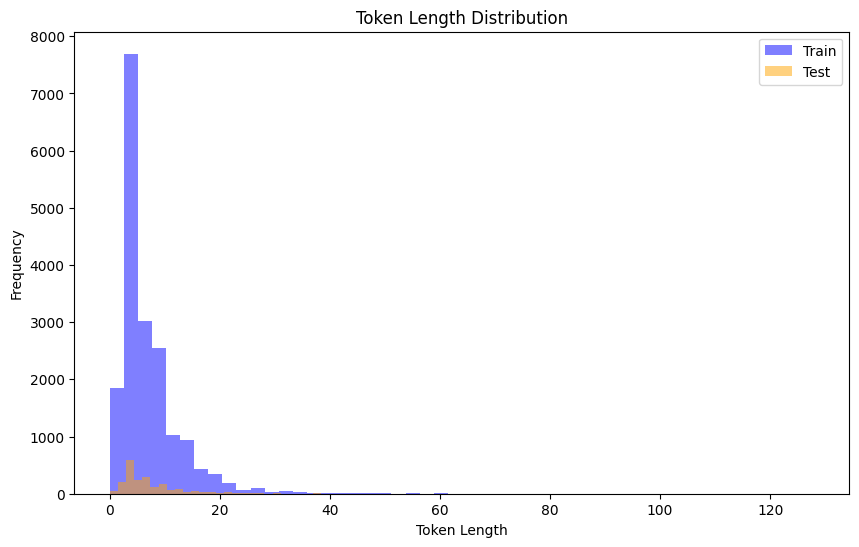

In [30]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [31]:
model = t.get_classifier()

In [32]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [33]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [34]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
2303/2303 [==============================] - 1422s 605ms/step - loss: 1.4047 - accuracy: 0.4187 - val_loss: 1.1465 - val_accuracy: 0.5530
Epoch 2/10
2303/2303 [==============================] - 1389s 603ms/step - loss: 1.1649 - accuracy: 0.5397 - val_loss: 1.1423 - val_accuracy: 0.5525
Epoch 3/10
2303/2303 [==============================] - 1389s 603ms/step - loss: 1.0641 - accuracy: 0.5784 - val_loss: 1.0288 - val_accuracy: 0.5926
Epoch 4/10
2303/2303 [==============================] - 1389s 603ms/step - loss: 0.9839 - accuracy: 0.6148 - val_loss: 1.0314 - val_accuracy: 0.5979
Epoch 5/10
2303/2303 [==============================] - 1389s 603ms/step - loss: 0.9284 - accuracy: 0.6346 - val_loss: 1.0841 - val_accuracy: 0.5813
Epoch 6/10
2303/2303 [==============================] - 1389s 603ms/step - loss: 0.8709 - accuracy: 0.6590 - val_loss: 1.0240 - val_accuracy: 0.5950
Epoch 7/10
2303/2303 [=====================

In [35]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [36]:
classes=t.get_classes()

In [37]:
cm = learner.validate(class_names=t.get_classes())

64/64 [==============================] - 17s 214ms/step
              precision    recall  f1-score   support

       Anger       0.54      0.51      0.53       362
        Fear       0.30      0.15      0.20        20
         Joy       0.62      0.64      0.63       743
        Love       0.55      0.54      0.55       414
     Sadness       0.72      0.74      0.73       429
    Surprise       0.18      0.18      0.18        79

    accuracy                           0.60      2047
   macro avg       0.49      0.46      0.47      2047
weighted avg       0.59      0.60      0.60      2047



In [38]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [39]:
!zip -r mental.zip /kaggle/output/model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/model

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/model)


In [40]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [41]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [42]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")